## Week 6: K-means Clustering

**(1a) Load the data file 'kmc-data1.xlsx' and visualize the data.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
data = pd.read_excel('kmc.xlsx', sheetname = 'Data1', header = None)

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
data.columns = ['X', 'Y']

In [4]:
data.describe()

,X,Y
count,300.000000,300.000000
mean,-0.042479,2.647752
std,3.346732,2.176512
min,-5.999158,-2.589323
25%,-3.359573,0.674117
50%,-0.022848,3.256135
75%,3.136942,4.222386
max,6.066461,7.494883


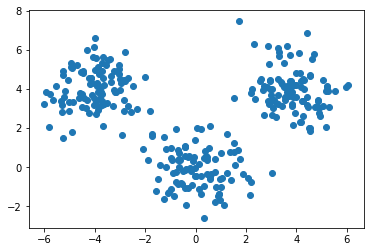

In [5]:
plt.scatter(data['X'], data['Y'])

**(1b) Implement K-means clustering. **

**(1c) Let $K = 3$ and the initial cluster means be $[0,0], [4,4]$ and $[-4,4]$. Plot the final clusters with K-means clustering.**

In [6]:
def centroid(points):
    points = np.array(points)
    x = np.mean(points[:,0])
    y = np.mean(points[:,1])
    return [x, y]
def initialize_clusters(clusters, n):
    for i in range(n):
        clusters[i] = []
    return clusters
def cluster_distance(data, n, cluster_points):
    data_val = data.values
    cluster_points = np.array(cluster_points)
    distance_matrix = np.zeros((data.shape[0], n))
    for i in range(data.shape[0]):
        for j in range(n):
            distance_matrix[i,j] = np.linalg.norm(cluster_points[j] - data_val[i])
    return distance_matrix
def cluster_points_up(distance_matrix, data):
    data_val = data.values
    clusters = initialize_clusters({}, n)
    for i in range(data.shape[0]):
        index = np.argmin(distance_matrix[i])
        clusters[index].append(list(data_val[i]))
    return clusters

In [7]:
cluster_centers = [[0,0], [4,4], [-4,4]]
n = 3
iterations = 10
for i in range(iterations):
    distance_matrix = cluster_distance(data, n, cluster_centers)
    cluster_points = cluster_points_up(distance_matrix, data)
    for j in range(n):
        cluster_centers[j] = centroid(cluster_points[j])

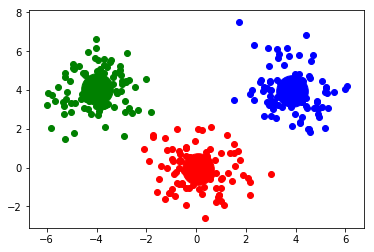

In [8]:
cluster1 = np.array(cluster_points[0])
plt.scatter(cluster_centers[0][0], cluster_centers[0][1],c = 'r',s = 1000)
plt.scatter(cluster1[:,0], cluster1[:,1], c = 'r')
plt.scatter(cluster_centers[1][0], cluster_centers[1][1],c = 'b',s = 1000)
cluster2 = np.array(cluster_points[1])
plt.scatter(cluster2[:,0], cluster2[:,1], c = 'b')
cluster3 = np.array(cluster_points[2])
plt.scatter(cluster_centers[2][0], cluster_centers[2][1],c = 'g',s = 1000)
plt.scatter(cluster3[:,0], cluster3[:,1], c = 'g')

**(1d) Compute the sum of square distance of each point from the cluster mean.**

In [12]:
def sum_of_squared_distance(distance_matrix):    
    sum_sq = 0
    for i in range(distance_matrix.shape[0]):
        sum_sq += min(distance_matrix[i])**2
    
    return sum_sq
print(sum_of_squared_distance(distance_matrix))

589.9093182547095


**(1e) Repeat the above exercise for all $K = 2,3,4$. **

**(1f) Plot the final clusters (for $K = 2,3,4$) and report the sum of square distance of each point from the cluster mean. Comment.**

In [14]:
cluster_centers = [[0,0], [4,4]]
n = 2
iterations = 10
for i in range(iterations):
    distance_matrix = cluster_distance(data, n, cluster_centers)
    cluster_points = cluster_points_up(distance_matrix, data)
    for j in range(n):
        cluster_centers[j] = centroid(cluster_points[j])

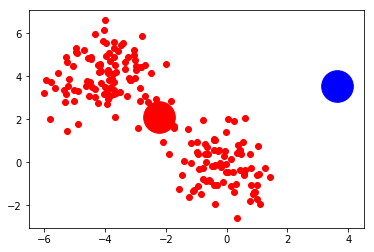

In [15]:
cluster1 = np.array(cluster_points[0])
plt.scatter(cluster_centers[0][0], cluster_centers[0][1],c = 'r',s = 1000)
plt.scatter(cluster1[:,0], cluster1[:,1], c = 'r')
plt.scatter(cluster_centers[1][0], cluster_centers[1][1],c = 'b',s = 1000)
cluster2 = np.array(cluster_points[1])

In [16]:
print(sum_of_squared_distance(distance_matrix))

2219.671971591101


In [17]:
cluster_centers = [[2,2], [5,5], [3,3]]
n = 3
iterations = 10
for i in range(iterations):
    distance_matrix = cluster_distance(data, n, cluster_centers)
    cluster_points = cluster_points_up(distance_matrix, data)
    for j in range(n):
        cluster_centers[j] = centroid(cluster_points[j])

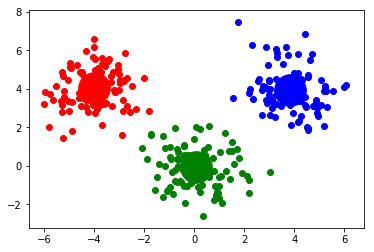

In [18]:
cluster1 = np.array(cluster_points[0])
plt.scatter(cluster_centers[0][0], cluster_centers[0][1],c = 'r',s = 1000)
plt.scatter(cluster1[:,0], cluster1[:,1], c = 'r')
plt.scatter(cluster_centers[1][0], cluster_centers[1][1],c = 'b',s = 1000)
cluster2 = np.array(cluster_points[1])
plt.scatter(cluster2[:,0], cluster2[:,1], c = 'b')
cluster3 = np.array(cluster_points[2])
plt.scatter(cluster_centers[2][0], cluster_centers[2][1],c = 'g',s = 1000)
plt.scatter(cluster3[:,0], cluster3[:,1], c = 'g')

In [19]:
print(sum_of_squared_distance(distance_matrix))

589.9093182547095


In [20]:
cluster_centers = [[2,2], [5,5], [3,3], [-2,2]]
n = 4
iterations = 10
for i in range(iterations):
    distance_matrix = cluster_distance(data, n, cluster_centers)
    cluster_points = cluster_points_up(distance_matrix, data)
    for j in range(n):
        cluster_centers[j] = centroid(cluster_points[j])

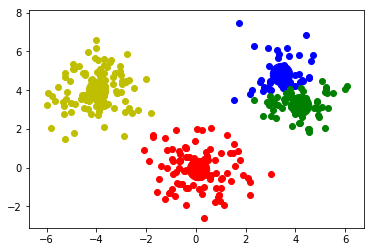

In [21]:
cluster1 = np.array(cluster_points[0])
plt.scatter(cluster_centers[0][0], cluster_centers[0][1],c = 'r',s = 500)
plt.scatter(cluster1[:,0], cluster1[:,1], c = 'r')
plt.scatter(cluster_centers[1][0], cluster_centers[1][1],c = 'b',s = 500)
cluster2 = np.array(cluster_points[1])
plt.scatter(cluster2[:,0], cluster2[:,1], c = 'b')
cluster3 = np.array(cluster_points[2])
plt.scatter(cluster_centers[2][0], cluster_centers[2][1],c = 'g',s = 500)
plt.scatter(cluster3[:,0], cluster3[:,1], c = 'g')
cluster4 = np.array(cluster_points[3])
plt.scatter(cluster_centers[3][0], cluster_centers[3][1], c = 'y', s = 500)
plt.scatter(cluster4[:,0], cluster4[:,1], c = 'y')

In [22]:
print(sum_of_squared_distance(distance_matrix))

515.4101338355796


**(2a) Load the data from the file 'kmc-data2.xlsx' and visualize the data. **

In [25]:
data = pd.read_excel('kmc.xlsx', sheetname = 'Data2')

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


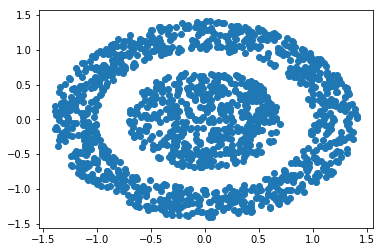

In [26]:
plt.scatter(data['X'], data['Y'])

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. **

In [31]:
print(data.shape)

(1492, 2)


In [41]:
cluster_centers = [[2,2], [3,3]]
n = 2
iterations = 10
for i in range(iterations):
    distance_matrix = cluster_distance(data, n, cluster_centers)
    cluster_points = cluster_points_up(distance_matrix, data)
    
    
print(distance_matrix.shape)
print('number of points belonging to first cluster: ',len(cluster_points[0]))
print('number of points belonging to second cluster: ',len(cluster_points[1]))

(1492, 2)
number of points belonging to first cluster:  1492
number of points belonging to second cluster:  0


**(2c) Suppose you want to cluster the data into two rings. Now, transform the data such that K-means clustering identifies the two rings as clusters. **

In [47]:
data['Radius'] = np.sqrt(data['X']**2 + data['Y']**2)

In [69]:
cluster_centers = [[0.1,0,0], [0.2,0,1.5]]
n = 2
iterations = 100
for i in range(iterations):
    distance_matrix = cluster_distance(data, n, cluster_centers)
    cluster_points = cluster_points_up(distance_matrix, data)
    
    

In [70]:
print(distance_matrix.shape)
print('number of points belonging to first cluster: ',len(cluster_points[0]))
print('number of points belonging to second cluster: ',len(cluster_points[1]))

(1492, 2)
number of points belonging to first cluster:  499
number of points belonging to second cluster:  993


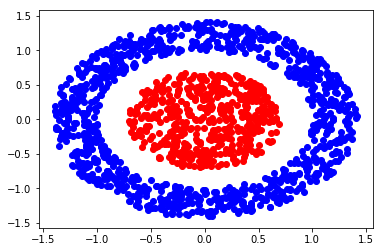

In [72]:
cluster1 = np.array(cluster_points[0])
#plt.scatter(cluster_centers[0][0], cluster_centers[0][1],c = 'r',s = 500)
plt.scatter(cluster1[:,0], cluster1[:,1], c = 'r')
#plt.scatter(cluster_centers[1][0], cluster_centers[1][1],c = 'b',s = 500)
cluster2 = np.array(cluster_points[1])
plt.scatter(cluster2[:,0], cluster2[:,1], c = 'b')

**(3a) (Optional) Consider the data in 'kmc-data1.xlsx'. Now, approximate the distribution of the data with a mixture of Gaussians, one per cluster. Report the distribution. **

**(3b) (Optional) Sample points from the mixture distribution and see if the points lie in the same cluster (distribution) from which it was generated. **